# Modeling and Simulation in Python

Chapter 8

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

### Functions from the previous chapter

In [2]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [3]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end-1):
        results[t+1] = update_func(results[t], t, system)
        
    return results

### Reading the data

In [4]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

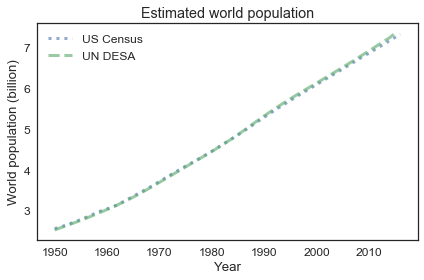

In [5]:
un = table2.un / 1e9
census = table2.census / 1e9
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')

### Running the quadratic model

Here's the update function for the quadratic growth model with parameters `alpha` and `beta`.

In [11]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

Extract the starting time and population.

In [12]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = get_first_value(census)

2.557628654

In [18]:
p_0

2.557628654

Initialize the system object.

In [13]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,values
t_0,1950.000000
t_end,2016.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


Run the model and plot results.

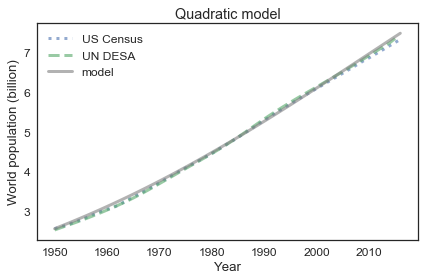

In [14]:
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'Quadratic model')

### Generating projections

To generate projections, all we have to do is change `t_end`

Saving figure to file chap04-fig01.pdf


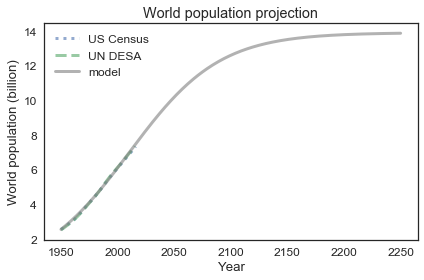

In [15]:
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'World population projection')
savefig('chap04-fig01.pdf')

The population in the model converges on the equilibrium population, `-alpha/beta`

In [16]:
results[system.t_end]

13.856665141368708

In [17]:
-system.alpha / system.beta

13.88888888888889

**Exercise:**  What happens if we start with an initial population above the carrying capacity, like 20 billion?  Run the model with initial populations between 1 and 20 billion, and plot the results on the same axes.

Saving figure to file chap04mine-fig01.pdf


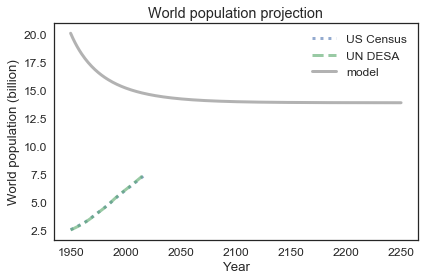

In [19]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=20.1,
                alpha=0.025,
                beta=-0.0018)
system.t_end = 2250
results = run_simulation(system, update_func_quad)
plot_results(census, un, results, 'World population projection')
savefig('chap04mine-fig01.pdf')


### Comparing projections

We can compare the projection from our model with projections produced by people who know what they are doing.

In [20]:
table3 = tables[3]
table3.head()

,United States Census Bureau (2015)[28],Population Reference Bureau (1973-2015)[15],United Nations Department of Economic and Social Affairs (2015)[16]
Year,,,
2016,7.334772e+09,NaN,7.432663e+09
2017,7.412779e+09,NaN,NaN
2018,7.490428e+09,NaN,NaN
2019,7.567403e+09,NaN,NaN
2020,7.643402e+09,NaN,7.758157e+09


`NaN` is a special value that represents missing data, in this case because some agencies did not publish projections for some years.

In [21]:
table3.columns = ['census', 'prb', 'un']

This function plots projections from the UN DESA and U.S. Census.  It uses `dropna` to remove the `NaN` values from each series before plotting it.

In [22]:
def plot_projections(table):
    """Plot world population projections.
    
    table: DataFrame with columns 'un' and 'census'
    """
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    
    plot(census_proj.dropna(), 'b:', label='US Census')
    plot(un_proj.dropna(), 'g--', label='UN DESA')

Run the model until 2100, which is as far as the other projections go.

In [23]:
system = System(t_0=t_0, 
                t_end=2100,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,values
t_0,1950.000000
t_end,2100.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


Saving figure to file chap04-fig02.pdf


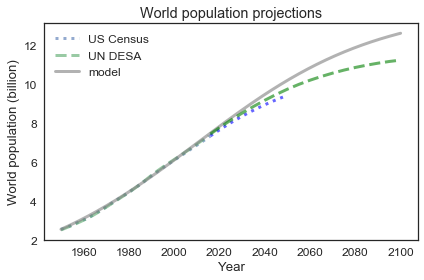

In [24]:
results = run_simulation(system, update_func_quad)

plot_results(census, un, results, 'World population projections')
plot_projections(table3)
savefig('chap04-fig02.pdf')

People who know what they are doing expect the growth rate to decline more sharply than our model projects.

## Exercises

**Optional exercise:** The net growth rate of world population has been declining for several decades.  That observation suggests one more way to generate projections, by extrapolating observed changes in growth rate.

The `modsim` library provides a function, `compute_rel_diff`, that computes relative differences of the elements in a sequence.  It is a wrapper for the NumPy function `ediff1d`:

In [25]:
source_code(compute_rel_diff)

def compute_rel_diff(seq):
    xs = np.asarray(seq)
    diff = np.ediff1d(xs, np.nan)
    return diff / seq



In [27]:
np.ediff1d

<function numpy.lib.arraysetops.ediff1d(ary, to_end=None, to_begin=None)>

Here's how we can use it to compute the relative differences in the `census` and `un` estimates:

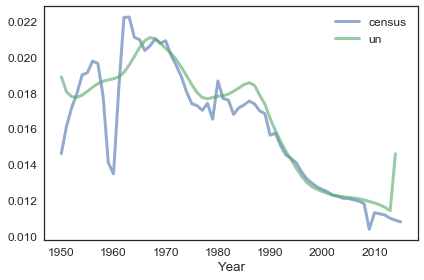

In [28]:
alpha_census = compute_rel_diff(census)
plot(alpha_census)

alpha_un = compute_rel_diff(un)
plot(alpha_un)

decorate(xlabel='Year', label='Net growth rate')

In [29]:
alpha_census

Year
1950    0.014588
1951    0.016121
1952    0.017173
1953    0.017962
1954    0.018999
1955    0.019123
1956    0.019769
1957    0.019640
1958    0.017835
1959    0.014092
1960    0.013462
1961    0.018199
1962    0.022208
1963    0.022236
1964    0.021097
1965    0.020968
1966    0.020363
1967    0.020623
1968    0.021010
1969    0.020769
1970    0.020909
1971    0.020115
1972    0.019534
1973    0.018902
1974    0.018044
1975    0.017388
1976    0.017283
1977    0.017018
1978    0.017404
1979    0.016522
          ...   
1987    0.017377
1988    0.016987
1989    0.016825
1990    0.015623
1991    0.015740
1992    0.015053
1993    0.014520
1994    0.014331
1995    0.014079
1996    0.013588
1997    0.013186
1998    0.012950
1999    0.012724
2000    0.012589
2001    0.012457
2002    0.012268
2003    0.012203
2004    0.012093
2005    0.012084
2006    0.012005
2007    0.011936
2008    0.011800
2009    0.010367
2010    0.011287
2011    0.011227
2012    0.011157
2013    0.010976
2014    0

In [30]:
alpha_un

Year
1950    0.018891
1951    0.018050
1952    0.017781
1953    0.017745
1954    0.017868
1955    0.018077
1956    0.018307
1957    0.018507
1958    0.018644
1959    0.018720
1960    0.018780
1961    0.018892
1962    0.019136
1963    0.019543
1964    0.020033
1965    0.020532
1966    0.020912
1967    0.021091
1968    0.021017
1969    0.020758
1970    0.020476
1971    0.020208
1972    0.019857
1973    0.019423
1974    0.018951
1975    0.018451
1976    0.018012
1977    0.017733
1978    0.017660
1979    0.017733
          ...   
1987    0.018413
1988    0.017863
1989    0.017365
1990    0.016556
1991    0.015898
1992    0.015281
1993    0.014738
1994    0.014262
1995    0.013793
1996    0.013343
1997    0.012989
1998    0.012748
1999    0.012596
2000    0.012476
2001    0.012364
2002    0.012281
2003    0.012223
2004    0.012180
2005    0.012148
2006    0.012115
2007    0.012070
2008    0.012004
2009    0.011919
2010    0.011830
2011    0.011728
2012    0.011588
2013    0.011402
2014    0

I used the output values for a alpha_un on 1965  and 2005 (40 years) to compute a linear slope: 
slope = (0.012180-0.02053)/40 years = -209e-6

To get the intercept, I plugged in the data for 1965 (1965, 0.020968) with the newly-found slope and got that the intercept = 0.42576. 

Other than a bump around 1990, net growth rate has been declining roughly linearly since 1965.  As an exercise, you can use this data to make a projection of world population until 2100.

1. Define a function, `alpha_func`, that takes `t` as a parameter and returns an estimate of the net growth rate at time `t`, based on a linear function `alpha = intercept + slope * t`.  Choose values of `slope` and `intercept` to fit the observed net growth rates since 1965.

2. Call your function with a range of `ts` from 1960 to 2020 and plot the results.

3. Create a `System` object that includes `alpha_func` as a system variable.

4. Define an update function that uses `alpha_func` to compute the net growth rate at the given time `t`.

5. Test your update function with `t_0 = 1960` and `p_0 = census[t_0]`.

6. Run a simulation from 1960 to 2100 with your update function, and plot the results.

7. Compare your projections with those from the US Census and UN.

In [32]:
system = System(t_0=1960, 
                t_end=2100,
                p_0= census[t_0],
                alpha=0.0,
               beta=-0.0018)

,values
t_0,1960.000000
t_end,2100.000000
p_0,2.557629
alpha,0.000000
beta,-0.001800


In [33]:
def alpha_func(pop, t, system):
    """Update population based on a quadratic model that adjusts the alpha
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    system.alpha = 0.42576-(209e-6)*t
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

In [34]:
def run_simulation(system, alpha_func):
    """Simulate the system using any update function.
    
    system: System object
    alpha_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end-1):
        results[t+1] = alpha_func(results[t], t, system)
        
    return results

Saving figure to file chap04min-fig04.pdf


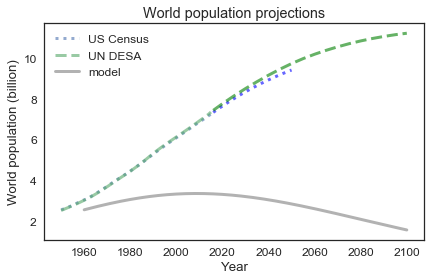

In [35]:
results = run_simulation(system, alpha_func)

plot_results(census, un, results, 'World population projections')
plot_projections(table3)
savefig('chap04min-fig04.pdf')

In [28]:
# Solution goes here

In [29]:
# Solution goes here

In [30]:
# Solution goes here

In [31]:
# Solution goes here